# 这两种写法是一样的
```python
@decorate
def target():
    print('running target()')

def target():
    print('running target()')
target = decorate(target)
```

# 装饰器通常把函数替换成另一个函数
```python
>>> def deco(func):
    ... def inner():
        ... print('running inner()')
    ... return inner ➊
...
>>> @deco
... def target(): ➋
    ... print('running target()')
...
>>> target() ➌
running inner()
>>> target ➍
<function deco.<locals>.inner at 0x10063b598>
```

# Python何时执行装饰器
1. 装饰器的一个关键特性是，它们在被装饰的函数定义之后立即运行。这通常是在导入时

# 使用装饰器改进“策略”模式
1. 促销策略函数无需使用特殊的名称（即不用以 _promo 结尾）
2. @promotion 装饰器突出了被装饰的函数的作用，还便于临时禁用某个促销策略：只需把装饰器注释掉
3. 促销折扣策略可以在其他模块中定义，在系统中的任何地方都行，只要使用 @promotion装饰即可
4. 缺点：多数装饰器会修改被装饰的函数。通常，它们会定义一个内部函数，然后将其返回，替换被装饰的函数

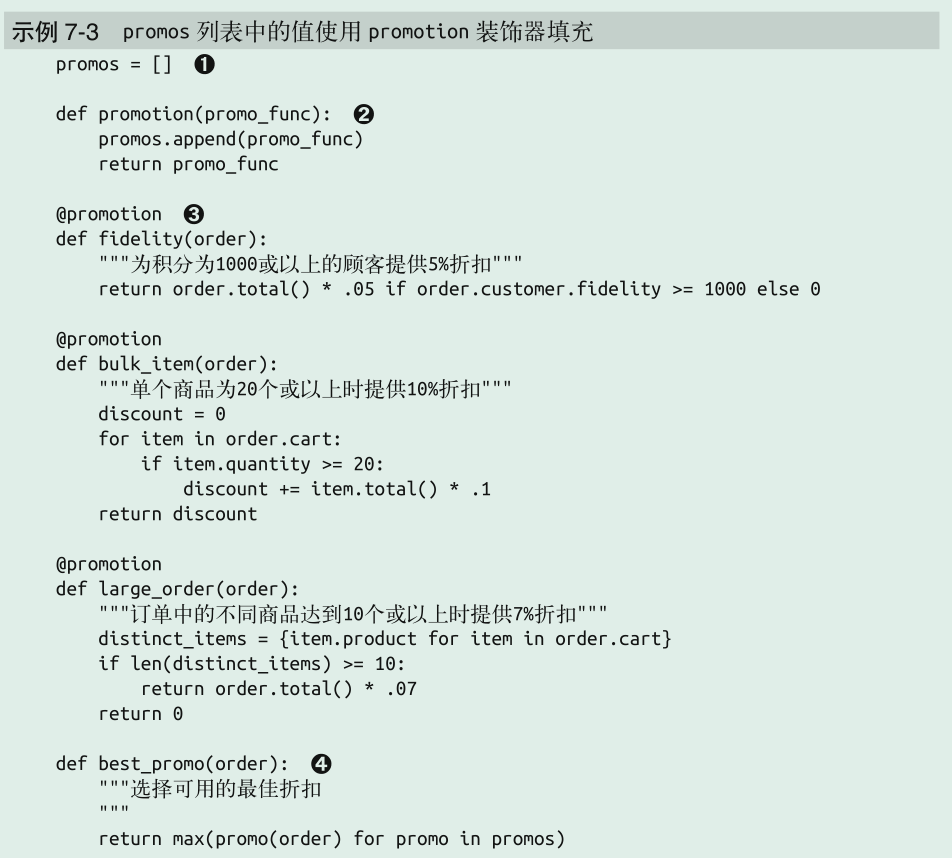

# 变量作用域规则

In [21]:
b = 9
def f3(a):
    a = 3
    print(b)
    b = 5 # 为什么会这样子，因为b是会直接声明，函数内部只会找到这个b，然而赋值直到这里才执行

In [20]:
f3(3) # 出错原因见上

UnboundLocalError: local variable 'b' referenced before assignment

In [33]:
b = 8
def f3(a):
    a = 3 
    global b  # 这里把b申明为外部global
    print(b)
    b = 5
    print(b)

In [34]:
f3(3)
print(b)

8
5
5


# 闭包
1. 闭包指延伸了作用域的函数，其中包含函数定义体中引用、但是不在定义体中定义的非全局变量
2. 关键就是访问定义体之外的非全局变量

In [35]:
# 计算移动平均值的类
class Averager():
    def __init__(self):
        self.series = []
        
    def __call__(self, new_value):
        self.series.append(new_value)
        total = sum(self.series)
        return total/len(self.series)

In [36]:
# 计算移动平均值的高阶函数
def make_averager():
    series = []
    
    def averager(new_value):
        series.append(new_value)
        total = sum(series)
        return total/len(series)
    return averager

1. make_average执行后
2. 在avenger这里，series是自由变量，未在本地作用域绑定的变量
3. 闭包是一种函数，它会保留定义函数时存在的自由变量的绑定，这样调用函数时，虽然定义作用域不可用了，但是仍能使用那些绑定

#  nonlocal 声明
1. 处理非引用（值），例如上面的闭包series是引用的

```python
def make_averager():
    count = 0
    total = 0
    def averager(new_value):
        count += 1
        total += new_value
        return total / count
    return averager
```
1. 这里是不可行的
2. 对数字、字符串、元组等不可变类型来说，只能读取，不能更新
3. 尝试重新绑定，例如 count = count + 1 ，其实会隐式创建局部变量 count
4. 这样， count 就不是自由变量了，因此不会保存在闭包中

In [39]:
def make_averager():
    count = 0
    total = 0
    
    def averager(new_value):
        nonlocal count, total
        count += 1
        total += new_value
        return total / count
    return averager

In [40]:
ave = make_averager()

In [41]:
ave(1)
ave(2)

1.5

# 实现一个简单的装饰器

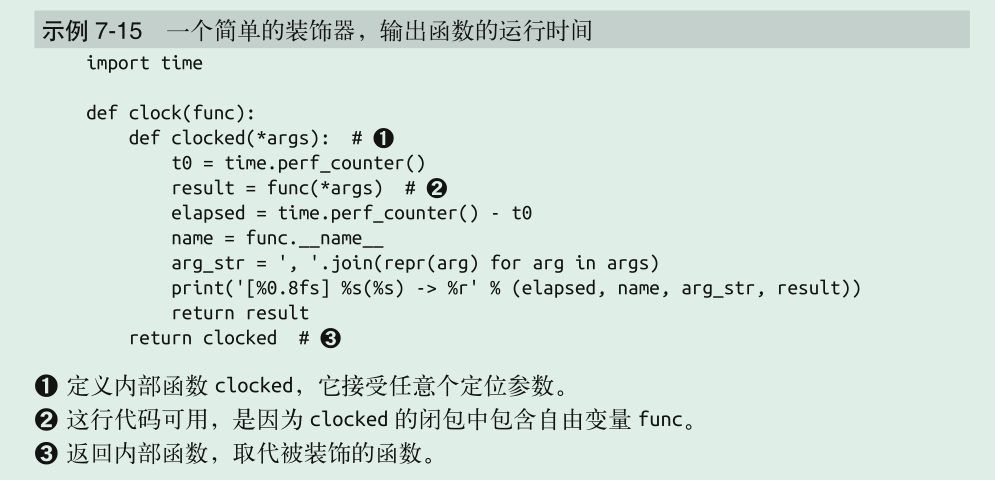

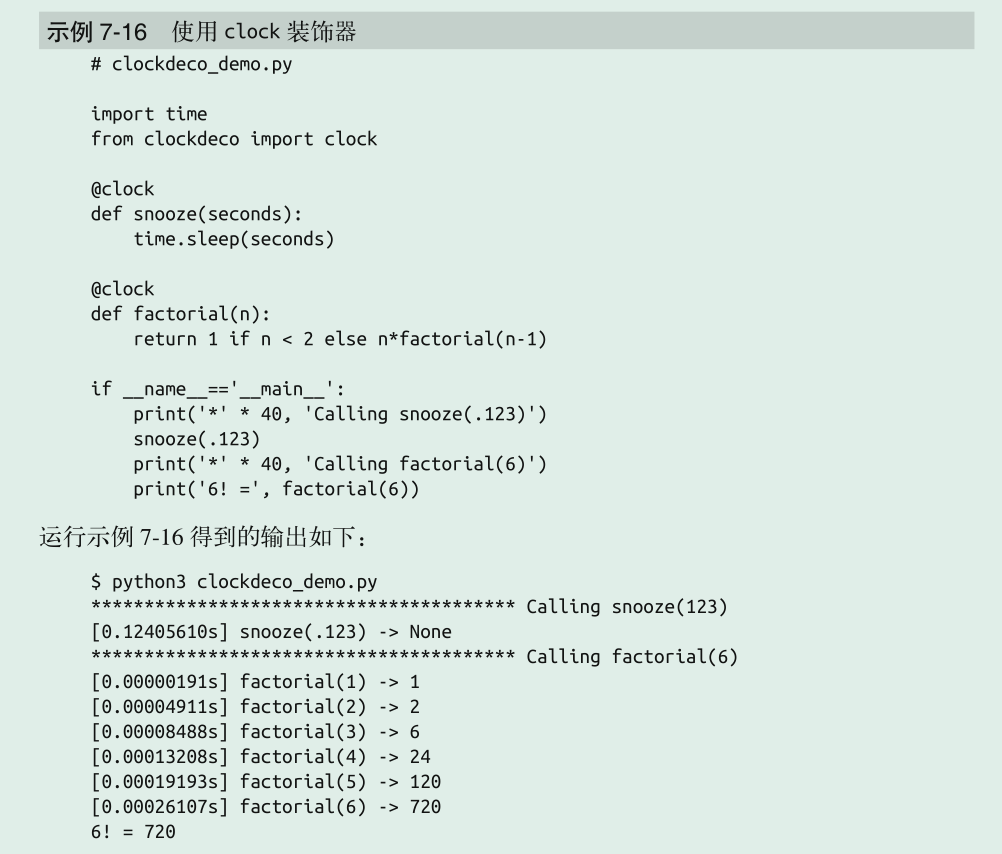

1. 这样做，函数的会变成clocked函数的引用，只不过clocked的参数是函数
2. clock 装饰器有几个缺点：不支持关键字参数，而且遮盖了被装饰函数的 __name__ 和 __doc__ 属性

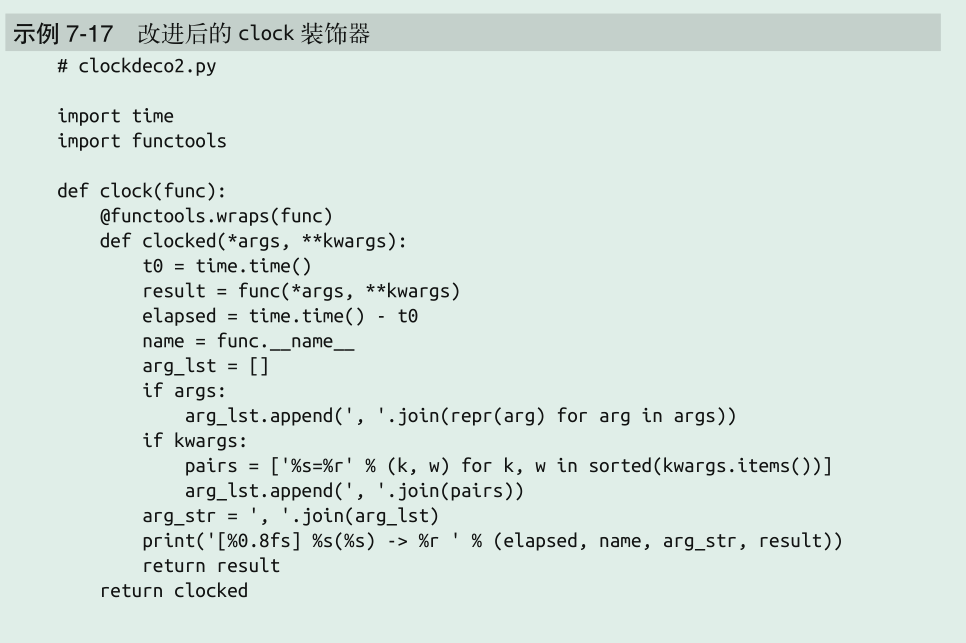

1. 使用 functools.wraps可以解决上面的两个问题

# 标准库中的装饰器
1. Python 内置了三个用于装饰方法的函数： property 、 classmethod 和 staticmethod
2. 另一个常见的装饰器是 functools.wraps ，它的作用是协助构建行为良好的装饰器

### 使用 functools.lru_cache 做备忘

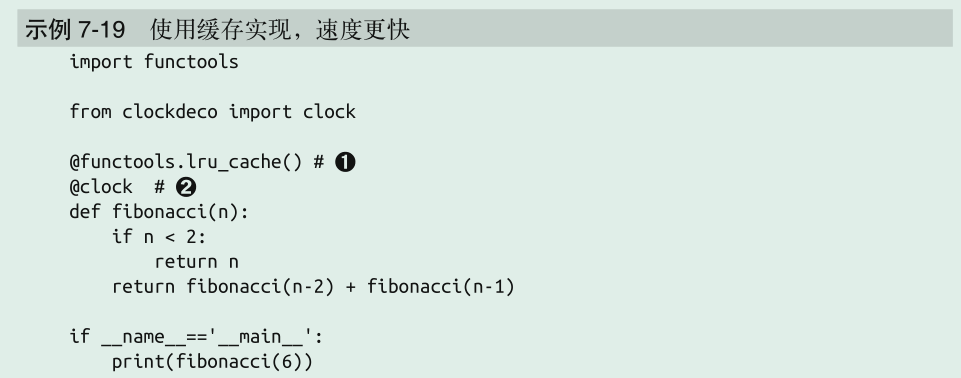

### 单分派泛函数

# 叠放装饰器
把 @d1 和 @d2 两个装饰器按顺序应用到 f 函数上，作用相当于 f = d1(d2(f)) 。

# 参数化装饰器

In [53]:
def decorator_with_args(arg, kargs):
    def decorator(func):
        def wrapper(*args, **kwargs):
            # 在这里可以使用传递的参数 arg1 和 arg2
            print("The arguments are:", arg, kargs,'\n')
            # 在这里调用被装饰的函数，并传递原始参数
            return func(*arg, **kargs)
        return wrapper
    return decorator

@decorator_with_args("Hello", {'name':'jack'})
def my_function(*args,**kargs):
    for value in args:
        print(value)
    for key in kargs:
        print (kargs[key])
    print("\nInside the function")

# 调用被装饰的函数
my_function()

The arguments are: Hello {'name': 'jack'} 

H
e
l
l
o
jack

Inside the function
